In [2]:
from datasets import load_dataset
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA_US = df_DA[df_DA['job_country'] == 'United States']

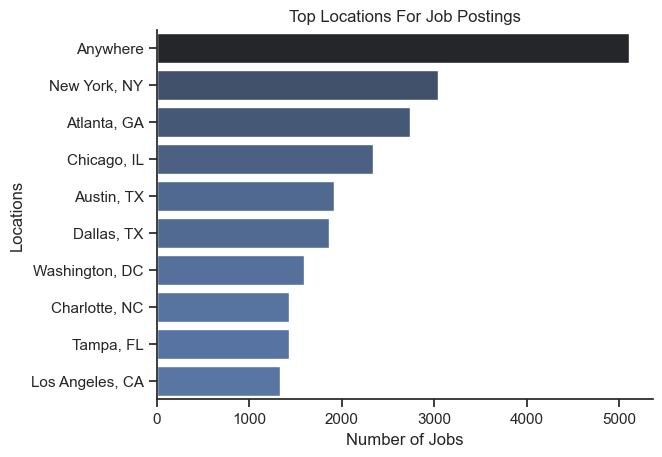

In [ ]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top Locations For Data Analysts Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('Locations')
plt.show()

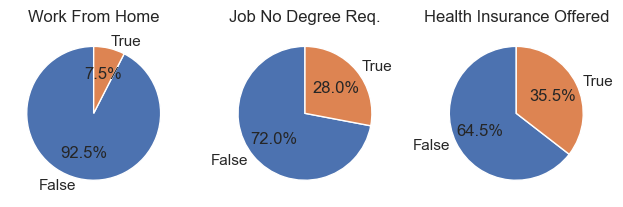

In [16]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job No Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    fig.tight_layout()

plt.show()

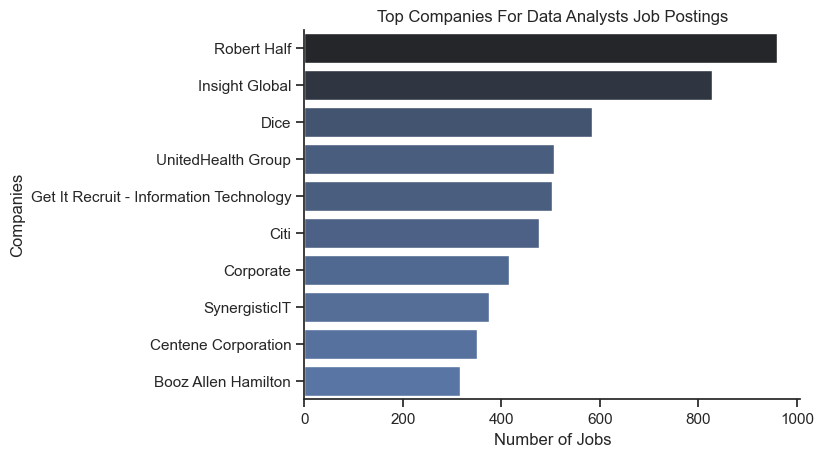

In [19]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()


sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top Companies For Data Analysts Job Postings')
plt.xlabel('Number of Jobs')
plt.ylabel('Companies')
plt.show()